# Data Understanding Customers

## Import of libraries and dataset

In [53]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# import dataset and create a copy to work with
df = pd.read_csv("drive/MyDrive/UNI MAGISTRALE/AI Project/data/customers.csv")
df_cust = df.copy()

In [56]:
#visualization of the first rows
df_cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## General analysis of the dataset

In [57]:
#dimensions
df_cust.shape

(1371980, 7)

In [58]:
#general description of numeric columns
df_cust.describe().round()

,FN,Active,age
count,476930.0,464404.0,1356119.0
mean,1.0,1.0,36.0
std,0.0,0.0,14.0
min,1.0,1.0,16.0
25%,1.0,1.0,24.0
50%,1.0,1.0,32.0
75%,1.0,1.0,49.0
max,1.0,1.0,99.0


In [59]:
# finding duplicates from the dataset
duplicated_values = df_cust.duplicated().sum()
print("In the dataframe there are", duplicated_values, "duplicated values")

In the dataframe there are 0 duplicated values


In [60]:
#finding missing values
df_cust.isna().any()

customer_id               False
FN                         True
Active                     True
club_member_status         True
fashion_news_frequency     True
age                        True
postal_code               False
dtype: bool

In [61]:
#finding the number of missing values in every column
df_cust.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

## Dealing with specific columns

### Age
Age of the customer

<Axes: >

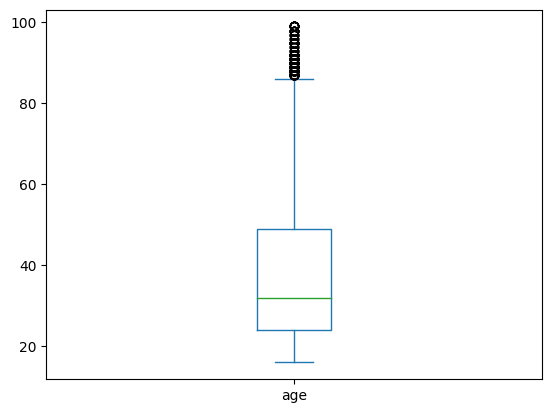

In [62]:
# boxplot to see the distribution of the data
df_cust["age"].plot.box()

In [63]:
df_cust["age"].describe().round()
#since maximum and minimum values are likely, I only have to deal with missing values

count    1356119.0
mean          36.0
std           14.0
min           16.0
25%           24.0
50%           32.0
75%           49.0
max           99.0
Name: age, dtype: float64

In [64]:
#number and percentage of missing values
miss_age = df_cust["age"].isna().sum()
print(f"The number of missing values in AGE column is {miss_age}")
perc_miss_age = (miss_age/df_cust.shape[0] )*100
print(f"The percentage of missing values in AGE column is {perc_miss_age} %")

The number of missing values in AGE column is 15861
The percentage of missing values in AGE column is 1.1560664149623172 %


In [13]:
# we could drop these rows, since they're the 1% of the dataset,
# but I would suggest to replace them with the median value

In [65]:
# find the median value of the column
mediana = df_cust["age"].median(skipna=True)
print(f"The median value of age column is {mediana}")

The median value of age column is 32.0


In [66]:
# Replace missing values with median value
df_cust["age"].fillna(mediana, inplace=True)

In [67]:
df_cust["age"].isna().any() #no more missing values here

False

<Axes: >

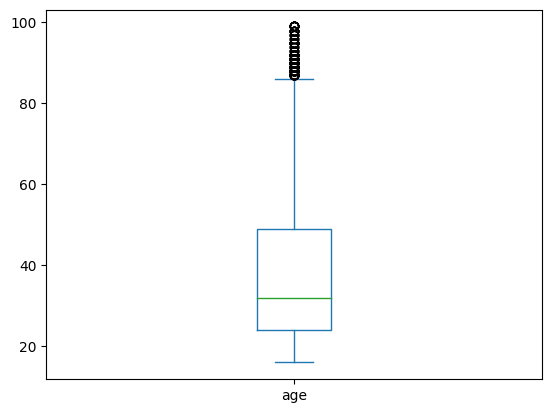

In [68]:
#boxplot to see if the distribution changed too much, but it seems okay
df_cust["age"].plot.box()

In [69]:
#num of elements over 75% percentile
df_cust["age"][df_cust["age"] > 80].count()

1112

In [70]:
# I'd also suggest to consider age>80 as outliers and remove/replace them

### Fashion News Frequency
If the costumer has a subscription to the newsletter, how frequently they receive one.
I considered "nan" as missing value and "none"/"NONE" as they don't have a subscription so they don't receive any news

In [71]:
# verify which are the values of this column
df_cust["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [72]:
#I replace "NONE" and "None" values with "Never"
df_cust["fashion_news_frequency"] = df_cust["fashion_news_frequency"].replace('None', 'Never')
df_cust["fashion_news_frequency"] = df_cust["fashion_news_frequency"].replace('NONE', 'Never')

In [74]:
#total of missing values and percentage
miss_news = df_cust["fashion_news_frequency"].isna().sum()
perc_miss_news = (miss_news/df_cust.shape[0])*100
print(f"The number of missing values in FASHION NEWS FREQUENCY column is {miss_news}")
print(f"The percentage of missing values in FASHION NEWS FREQUENCY column is {perc_miss_news}%")

The number of missing values in FASHION NEWS FREQUENCY column is 16009
The percentage of missing values in FASHION NEWS FREQUENCY column is 1.1668537442236768%


In [75]:
#I could drop these data since it is only 1% of the rows,
# but I suggest to replace missing values with "Never"

In [76]:
# Replace missing values with "Never"
#df_cust["fashion_news_frequency"].fillna("Never", inplace=True)

<Axes: >

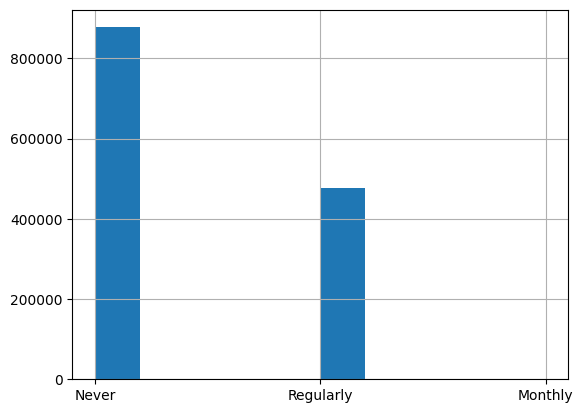

In [78]:
# plot the histogram to see the distribution
df_cust["fashion_news_frequency"].hist()

In [27]:
# how many records we have with "Monthly value"
df_cust["fashion_news_frequency"][df_cust["fashion_news_frequency"] == "Monthly"].count()

842

In [28]:
# We can consider them as outliers, and replace them with "regularly"
df_cust["fashion_news_frequency"] = df_cust["fashion_news_frequency"].replace('Monthly', 'Regularly')

<Axes: >

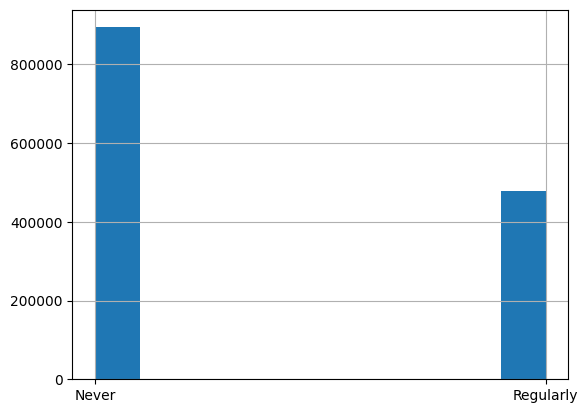

In [29]:
df_cust["fashion_news_frequency"].hist() # a little more balanced

### FN
if a customer get Fashion News newsletter

In [79]:
#check values of the column
df_cust["FN"].unique()

array([nan,  1.])

In [80]:
# percentage of missing values
miss_fn = df_cust["FN"].isna().sum()
perc_miss_fn = (miss_fn/df_cust.shape[0])*100

print(f"The number of missing values in FN column is {miss_fn}")
print(f"The percentage of missing values in FN column is {perc_miss_fn}%")

#most of the record is missing values

The number of missing values in FN column is 895050
The percentage of missing values in FN column is 65.23783145526903%


In [32]:
#check the overlapping between fn and fashion_news_frequency
conta = 0
just_one_fn = df_cust["FN"][df_cust["FN"] == 1.]
just_one_news =  df_cust["fashion_news_frequency"][df_cust["FN"] == 1.]

print(f"The number of records with fn == 1 is {len(just_one_fn)}")
print()
print("Among those values, this is the distribution of fashion_news_frequency values:")
print(just_one_news.value_counts())

The number of records with fn == 1 is 476930

Among those values, this is the distribution of fashion_news_frequency values:
Regularly    476139
Never           791
Name: fashion_news_frequency, dtype: int64


In [33]:
news_reg = df_cust.query('fashion_news_frequency == "Regularly" & FN == 1.0')
freq_reg = df_cust.query('fashion_news_frequency == "Regularly"')
news_nev = df_cust.query('fashion_news_frequency == "Never" & FN == 1.0')
print(len(news_reg))

print(f"the {(len(news_reg)/len(freq_reg))*100}% of records with fashion_news_frequency regularly has FN = 1")
print(f"the {(len(news_nev)/len(freq_reg))*100}% of records with fashion_news_frequency never has FN = 1")

476139
the 99.55693370523859% of records with fashion_news_frequency regularly has FN = 1
the 0.16539190144231775% of records with fashion_news_frequency never has FN = 1


In [34]:
# I'd suggest to replace FN and Fashion news frequency with a new column since they overlap a lot

### NEW: receive_news
If the customer gets or not the newsletter

In [81]:
#create a new column based on fashion_news_frequency and FN
df_cust["receive_news"] = df_cust["fashion_news_frequency"].apply(lambda x: "Yes" if x == "Regularly" else "No")

In [82]:
df_cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,receive_news
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,Never,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,No
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,Never,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,No
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,Never,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,No
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,Never,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,No
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,Yes


### Active
if the customer is active for communication

In [87]:
# check possible value of the column
df_cust["Active"].unique()

array([nan,  1.])

In [88]:
# percentage of missing values
miss_active = df_cust["Active"].isna().sum()
perc_miss_active = (miss_active/df_cust.shape[0])*100

print(f"The number of missing values in ACTIVE column is {miss_active}")
print(f"The percentage of missing values in ACTIVE column is {perc_miss_active}%")

#most of the record is missing values

The number of missing values in ACTIVE column is 907576
The percentage of missing values in ACTIVE column is 66.15081852505138%


In [89]:
# check overlapping between receive news and Active
news_reg = df_cust.query('fashion_news_frequency == "Regularly" & Active == 1.0')
freq_reg = df_cust.query('fashion_news_frequency == "Regularly"')
news_nev = df_cust.query('fashion_news_frequency == "Never" & Active == 1.0')
print(len(news_reg))

print(f"the {(len(news_reg)/len(freq_reg))*100}% of records with fashion_news_frequency regularly has Active = 1")
print(f"the {(len(news_nev)/len(freq_reg))*100}% of records with fashion_news_frequency never has Active = 1")

463106
the 97.00261407242321% of records with fashion_news_frequency regularly has Active = 1
the 0.10473046567354258% of records with fashion_news_frequency never has Active = 1


In [40]:
# active overlaps with receive_news, and I would suggest to merge the column
# also because active has a lot of missing values

In [41]:
#remove active column
df_cust = df_cust.drop('Active', axis=1)

### Club Member Status
H&M pre-create status member means that you are a new member of the H&M loyalty program, but you have not yet activated your membership.


In [42]:
#check possible values
df_cust["club_member_status"].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [43]:
#number of missing values
miss_status = df_cust["club_member_status"].isna().sum()
perc_miss_status = (miss_status/df_cust.shape[0])*100

print(f"The number of missing values in column is {miss_status}")
print(f"The percentage of missing values in column is {perc_miss_status}%")

The number of missing values in column is 6062
The percentage of missing values in column is 0.44184317555649494%


In [44]:
counts = df_cust["club_member_status"].value_counts()
print(counts)

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


In [45]:
# I think we can drop the records with missing values,
# OR consider left club + missing as club_member_status = not active
#because left club records are almost outliers

<Axes: >

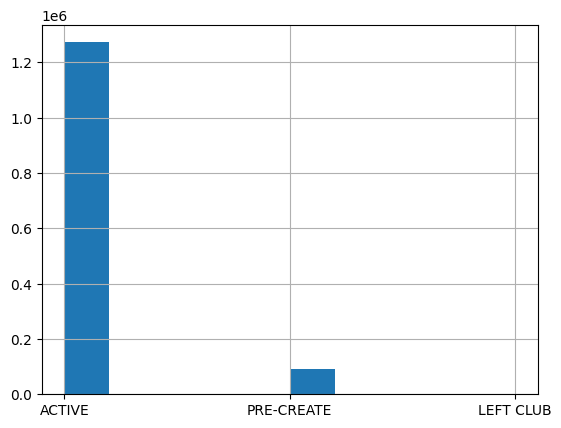

In [46]:
#distribution of data before transformation
df_cust["club_member_status"].hist()

In [47]:
#change values in binary
df_cust["club_member_status"] = df_cust["club_member_status"].replace('LEFT CLUB', 'Not active')
df_cust["club_member_status"] = df_cust["club_member_status"].replace('ACTIVE', 'Active')
df_cust["club_member_status"] = df_cust["club_member_status"].replace('PRE-CREATE', 'Pre-create')
df_cust["club_member_status"].fillna("Not active", inplace=True)

<Axes: >

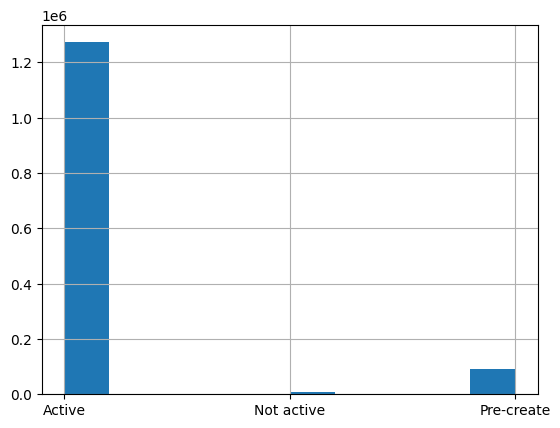

In [48]:
#distribution of data after transformation
df_cust["club_member_status"].hist()

In [49]:
counts = df_cust["club_member_status"].value_counts()
print(counts)

Active        1272491
Pre-create      92960
Not active       6529
Name: club_member_status, dtype: int64


### Customer ID

In [50]:
df_cust["customer_id"].isna().any() #no missing values

False

In [51]:
len(df_cust["customer_id"][0])

64

In [52]:
# i'll check if they have a common structure
same_length = True

for id in df_cust["customer_id"]:
  if len(id) != len(df_cust["customer_id"][0]):
    same_length = False

if same_length == True:
  print(f"Every id has the same length, equal to {len(id)}")
else:
  print(f"Some ids have a different length")

#they all have the same length
#I dont' think there's a pattern

Every id has the same length, equal to 64


In [ ]:
#check if they're all unique
df_cust['customer_id'].nunique() == len(df_cust)

True

### Postal Code

In [ ]:
df_cust["postal_code"].isna().any() #no missing values

False

In [ ]:
# i'll check if they have a common structure
for pc in df_cust["postal_code"]:
  if len(pc) != len(df_cust["postal_code"][0]):
    print(pc)

print(len(pc))
#they all have the same length
#I dont' think there's a pattern

64


In [ ]:
print(df_cust["postal_code"][0])
print(df_cust["postal_code"][1])

52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100
2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057


In [ ]:
df_cust['postal_code'].nunique()

352899

In [ ]:
df_cust['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

##Dataset finale (+esportazione)

In [ ]:
df_cust.head()

,customer_id,club_member_status,receive_news,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Active,No,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Active,No,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Active,No,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Active,No,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Active,yes,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
df_cust.shape

(1371980, 5)